In [8]:
from math import log
import numpy as np
import operator
import csv

## 加载数据集

In [9]:
def loaddata ():
    dataSet = [[0, 0,0,0,0,0, 'yes'],
               [1, 0,1,0,0,0,'yes'],
               [1, 0,0,0,0,0,'yes'],
               [0, 0,1,0,0,0,'yes'],
               [2, 0,0,0,0,0,'yes'],
               [0, 1,0,0,1,1,'yes'],
               [1, 1,0,1,1,1,'yes'],
               [1, 1,0,0,1,0, 'yes'],
               [1, 1,1,1,1,0,'no'],
               [0, 2,2,0,2,1,'no'],
               [2, 2,2,2,2,0,'no'],
               [2, 0,0,2,2,1,'no'],
               [0, 1,0,1,0,0, 'no'],
               [2, 1,1,1,0,0,'no'],
               [1, 1,0,0,1,1,'no'],
               [2, 0,0,2,2,0,'no'],
               [0, 0,1,1,1,0,'no']]
    feature_name = ['a1','a2','a3','a4','a5','a6']
    return dataSet, feature_name
#方式2
def loaddata_new():
    # 定义文件路径
    csv_path = 'watermelon2.csv'
    with open(csv_path,'r',encoding='utf-8-sig')as fp:
        dataSet = [i for i in csv.reader(fp)]  # csv.reader 读取到的数据是list类型
    feature_name = ['a1','a2','a3','a4','a5','a6']
    return dataSet, feature_name

## 计算数据集的熵
$$
Ent(D)=-\sum_{k=1}^{|y|} p_k log_2(p_k)
$$

In [10]:
def entropy(dataSet):
    #数据集条数
    m = len(dataSet)
    #保存所有的类别及属于该类别的样本数
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): 
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    #保存熵值
    e = 0.0 
    #补充计算信息熵的代码
    for key in labelCounts:
        p = float(labelCounts[key])/m
        e -= p*log(p,2)
    return e

In [11]:
def splitDataSet(dataSet, axis, value):
    #补充按给定特征和特征值划分好的数据集的abs代码
    # axis对应的是特征的索引;
    retDataSet = []
    #遍历数据集
    for featVec in dataSet:
        # 符合要求就把他加到创建的列表中
        if(featVec[axis]==value):
            rFeatVec = featVec[:axis]
            # axis所指向的那一列被抽掉，剩下的：
            rFeatVec.extend(featVec[axis+1:])
            retDataSet.append(rFeatVec)
    return retDataSet

In [12]:
def chooseBestFeature(dataSet):
    n = len(dataSet[0]) - 1
    #计数整个数据集的熵
    baseEntropy = entropy(dataSet)
    #初始化值：最好的信息增益和特征
    bestInfoGain = 0.0; bestFeature = -1
    #遍历每个特征
    for i in range(n):  
        #获取当前特征i的所有可能取值
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList) 
        newEntropy = 0.0
        #遍历特征i的每一个可能的取值
        for value in uniqueVals:
            #按特征i的value值进行数据集的划分
            subDataSet = splitDataSet(dataSet, i, value)
            #补充计算条件熵的代码
            # pk
            p = len(subDataSet)/float(len(dataSet))
            newEntropy += p * entropy(subDataSet)
        #计算信息增益
        infoGain = baseEntropy - newEntropy  
        #保存当前最大的信息增益及对应的特征
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [13]:
def classVote(classList):
    #定义字典，保存每个标签对应的个数 
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): 
            classCount[vote] = 0
        classCount[vote] += 1
     #排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [14]:
def trainTree(dataSet,feature_name):
    classList = [example[-1] for example in dataSet]
    #所有类别都一致
    if classList.count(classList[0]) == len(classList): 
        return classList[0] 
    #数据集中没有特征时，返回特征出现最多的
    if len(dataSet[0]) == 1:
        return classVote(classList)
    #选择最优划分特征
    bestFeat = chooseBestFeature(dataSet)
    bestFeatName = feature_name[bestFeat]
    myTree = {bestFeatName:{}}
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    #遍历uniqueVals中的每个值，生成相应的分支
    for value in uniqueVals:
        sub_feature_name = feature_name[:]
        # 生成在dataSet中bestFeat取值为value的子集；
        sub_dataset = splitDataSet(dataSet,bestFeat,value)#补充代码；
        # 根据得到的子集，生成决策树
        myTree[bestFeatName][value] = trainTree(sub_dataset,sub_feature_name)#补充代码；
    return myTree

In [15]:
myDat,feature_name = loaddata()
myTree = trainTree(myDat,feature_name)
print(myTree)

{'a4': {0: {'a2': {0: 'yes', 1: {'a1': {0: 'yes', 1: {'a3': {0: 'yes', 1: 'no'}}}}, 2: 'no'}}, 1: {'a5': {0: 'no', 1: 'yes'}}, 2: 'no'}}


## 绘制树形图
由于结果实在是不好观察，必须要借助一些工具可视化

In [16]:
import matplotlib.pyplot as plt

In [17]:
# 定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")

In [18]:
def plotNode(nodeText,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords='axes fraction',
                           xytext=centerPt,
                           textcoords='axes fraction',
                           va="center",
                           ha="center",
                           bbox=nodeType,
                           arrowprops=arrow_args)   

In [19]:
def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('a decision node',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('a leaf node',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

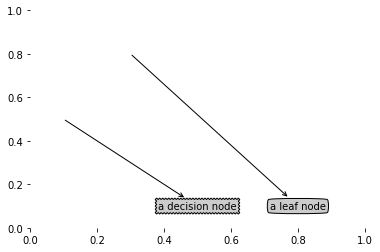

In [20]:
createPlot()

## 构建注解树
你需要知道的条件：
1. 叶子节点的数目（需要放置所有叶子节点确定x轴长度）
2. 树的层数（确定y轴的高度）

In [40]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if(type(secondDict[key]).__name__=='dict'):
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

In [47]:
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if (type(secondDict[key]).__name__=='dict'):
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if (thisDepth>maxDepth):
            maxDepth = thisDepth
    return maxDepth

In [48]:
getNumLeafs(myTree)
getTreeDepth(myTree)

4

In [43]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                  {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}}},1:'no'}}}]     
    return listOfTrees[i]

In [98]:
mytree = retrieveTree(0)
type(mytree)

dict

In [99]:
getNumLeafs(retrieveTree(0))

3

In [129]:
def plotNode(nodeText,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords='axes fraction',
                           xytext=centerPt,
                           textcoords='axes fraction',
                           va="center",
                           ha="center",
                           bbox=nodeType,
                           arrowprops=arrow_args)   

In [130]:
def plotMidText(cntrPt,parentPt,txtString):
    # 父子节点填充文本信息
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
#     print(type(parentPt[1]))
    print(cntrPt[1])
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

In [137]:
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/
              2.0/plotTree.totalW,plotTree.yOff)      
    
    if (type(cntrPt[1]).__name__=='dict'):
        print(plotTree.xOff)
        print(plotTree.yOff)
    elif (type(cntrPt[0]).__name__=='dict'):
        print(plotTree.xOff)
        print(plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    
    plotTree.yOff -= - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ =='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),
                    cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [138]:
def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

1.0
1.25
1.5
1.5
1.75
1.75
2.0
2.0
2.5
2.75
3.0
3.0
3.25


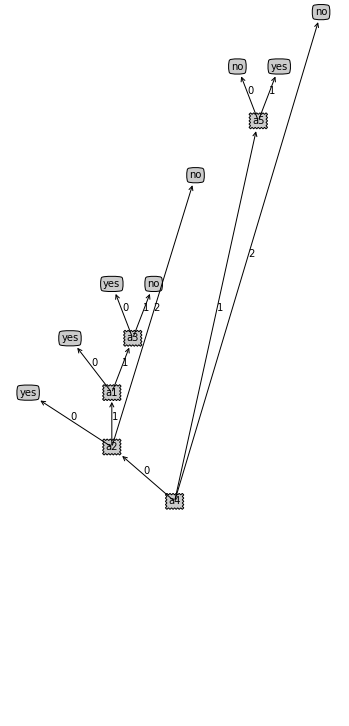

In [140]:
createPlot(myTree)